In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("db1b_market_filtered.csv")

In [3]:
print(df.columns)

Index(['ItinID', 'MktID', 'MktCoupons', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginStateFips',
       'OriginState', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestStateFips',
       'DestState', 'DestStateName', 'DestWac', 'AirportGroup', 'WacGroup',
       'TkCarrierGroup', 'OpCarrierGroup', 'RPCarrier', 'TkCarrier',
       'OpCarrier', 'Passengers', 'MktFare', 'MktDistance', 'MktMilesFlown',
       'NonStopMiles', 'ItinGeoType', 'MktGeoType'],
      dtype='object')


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# Assuming your dataframe is called 'df'
# df = pd.read_csv('your_file.csv')

# Categorize columns by type for appropriate visualization
numeric_continuous = ['MktFare', 'MktDistance', 'MktMilesFlown', 'NonStopMiles', 'Passengers']
numeric_discrete = ['MktCoupons', 'ItinGeoType', 'MktGeoType']
categorical_low_cardinality = ['Origin', 'Dest', 'OriginState', 'DestState', 
                                'RPCarrier', 'TkCarrier', 'OpCarrier', 
                                'AirportGroup', 'WacGroup', 'TkCarrierGroup', 'OpCarrierGroup']
id_fields = ['ItinID', 'MktID', 'OriginAirportID', 'OriginAirportSeqID', 
             'OriginCityMarketID', 'DestAirportID', 'DestAirportSeqID', 
             'DestCityMarketID', 'OriginStateFips', 'DestStateFips', 
             'OriginWac', 'DestWac', 'OriginStateName', 'DestStateName']

def analyze_numeric_continuous(df, columns):
    """Analyze continuous numeric variables"""
    n_cols = len(columns)
    fig, axes = plt.subplots(n_cols, 3, figsize=(18, 5*n_cols))
    
    if n_cols == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(columns):
        if col not in df.columns:
            continue
            
        data = df[col].dropna()
        
        # Histogram
        axes[idx, 0].hist(data, bins=50, edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'{col} - Histogram')
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel('Frequency')
        
        # Box plot
        axes[idx, 1].boxplot(data, vert=True)
        axes[idx, 1].set_title(f'{col} - Boxplot')
        axes[idx, 1].set_ylabel(col)
        
        # Log scale histogram (if positive values)
        if (data > 0).all():
            axes[idx, 2].hist(np.log10(data), bins=50, edgecolor='black', alpha=0.7)
            axes[idx, 2].set_title(f'{col} - Log10 Histogram')
            axes[idx, 2].set_xlabel(f'log10({col})')
        else:
            axes[idx, 2].text(0.5, 0.5, 'Contains non-positive values', 
                            ha='center', va='center', transform=axes[idx, 2].transAxes)
            axes[idx, 2].set_title(f'{col} - Log scale N/A')
        
        # Print statistics
        print(f"\n{col} Statistics:")
        print(f"  Count: {data.count()}")
        print(f"  Mean: {data.mean():.2f}")
        print(f"  Median: {data.median():.2f}")
        print(f"  Std: {data.std():.2f}")
        print(f"  Min: {data.min():.2f}")
        print(f"  Max: {data.max():.2f}")
        print(f"  25th percentile: {data.quantile(0.25):.2f}")
        print(f"  75th percentile: {data.quantile(0.75):.2f}")
        print(f"  Missing values: {df[col].isna().sum()}")
    
    plt.tight_layout()
    plt.show()

def analyze_numeric_discrete(df, columns):
    """Analyze discrete numeric variables"""
    n_cols = len(columns)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
    
    if n_cols == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(columns):
        if col not in df.columns:
            continue
            
        value_counts = df[col].value_counts().sort_index()
        
        # Bar plot
        axes[idx, 0].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'{col} - Value Counts')
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel('Frequency')
        
        # Percentage plot
        pct = (value_counts / len(df) * 100)
        axes[idx, 1].bar(pct.index, pct.values, edgecolor='black', alpha=0.7, color='coral')
        axes[idx, 1].set_title(f'{col} - Percentage Distribution')
        axes[idx, 1].set_xlabel(col)
        axes[idx, 1].set_ylabel('Percentage (%)')
        
        print(f"\n{col} Value Distribution:")
        print(value_counts)
        print(f"Unique values: {df[col].nunique()}")
        print(f"Missing values: {df[col].isna().sum()}")
    
    plt.tight_layout()
    plt.show()

def analyze_categorical(df, columns, top_n=20):
    """Analyze categorical variables"""
    for col in columns:
        if col not in df.columns:
            continue
            
        value_counts = df[col].value_counts().head(top_n)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar plot
        axes[0].barh(range(len(value_counts)), value_counts.values, alpha=0.7)
        axes[0].set_yticks(range(len(value_counts)))
        axes[0].set_yticklabels(value_counts.index)
        axes[0].set_xlabel('Frequency')
        axes[0].set_title(f'{col} - Top {top_n} Values')
        axes[0].invert_yaxis()
        
        # Percentage
        pct = (value_counts / len(df) * 100)
        axes[1].barh(range(len(pct)), pct.values, alpha=0.7, color='coral')
        axes[1].set_yticks(range(len(pct)))
        axes[1].set_yticklabels(pct.index)
        axes[1].set_xlabel('Percentage (%)')
        axes[1].set_title(f'{col} - Top {top_n} Percentage')
        axes[1].invert_yaxis()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n{col} Statistics:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most common: {value_counts.index[0]} ({value_counts.values[0]} occurrences)")
        print(f"  Missing values: {df[col].isna().sum()}")

def analyze_ids(df, columns):
    """Quick statistics for ID fields"""
    print("\n" + "="*60)
    print("ID FIELDS ANALYSIS")
    print("="*60)
    
    for col in columns:
        if col not in df.columns:
            continue
            
        print(f"\n{col}:")
        print(f"  Total records: {len(df)}")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Duplicates: {len(df) - df[col].nunique()}")
        print(f"  Missing values: {df[col].isna().sum()}")
        print(f"  Data type: {df[col].dtype}")

# Usage:
# analyze_numeric_continuous(df, numeric_continuous)
# analyze_numeric_discrete(df, numeric_discrete)
# analyze_categorical(df, categorical_low_cardinality, top_n=20)
# analyze_ids(df, id_fields)

print("Distribution Analysis Functions Ready!")
print("\nRun the following to analyze your data:")
print("1. analyze_numeric_continuous(df, numeric_continuous)")
print("2. analyze_numeric_discrete(df, numeric_discrete)")
print("3. analyze_categorical(df, categorical_low_cardinality, top_n=20)")
print("4. analyze_ids(df, id_fields)")

Distribution Analysis Functions Ready!

Run the following to analyze your data:
1. analyze_numeric_continuous(df, numeric_continuous)
2. analyze_numeric_discrete(df, numeric_discrete)
3. analyze_categorical(df, categorical_low_cardinality, top_n=20)
4. analyze_ids(df, id_fields)



MktFare Statistics:
  Count: 5736313
  Mean: 270.22
  Median: 228.00
  Std: 225.53
  Min: 0.11
  Max: 16936.00
  25th percentile: 150.89
  75th percentile: 332.55
  Missing values: 0

MktDistance Statistics:
  Count: 5736313
  Mean: 1388.73
  Median: 1179.00
  Std: 827.31
  Min: 31.00
  Max: 10533.00
  25th percentile: 793.00
  75th percentile: 1894.00
  Missing values: 0

MktMilesFlown Statistics:
  Count: 5736313
  Mean: 1388.73
  Median: 1179.00
  Std: 827.31
  Min: 31.00
  Max: 10533.00
  25th percentile: 793.00
  75th percentile: 1894.00
  Missing values: 0

NonStopMiles Statistics:
  Count: 5736313
  Mean: 1318.60
  Median: 1104.00
  Std: 789.39
  Min: 31.00
  Max: 9362.00
  25th percentile: 746.00
  75th percentile: 1782.00
  Missing values: 0

Passengers Statistics:
  Count: 5736313
  Mean: 2.12
  Median: 1.00
  Std: 5.47
  Min: 1.00
  Max: 845.00
  25th percentile: 1.00
  75th percentile: 2.00
  Missing values: 0


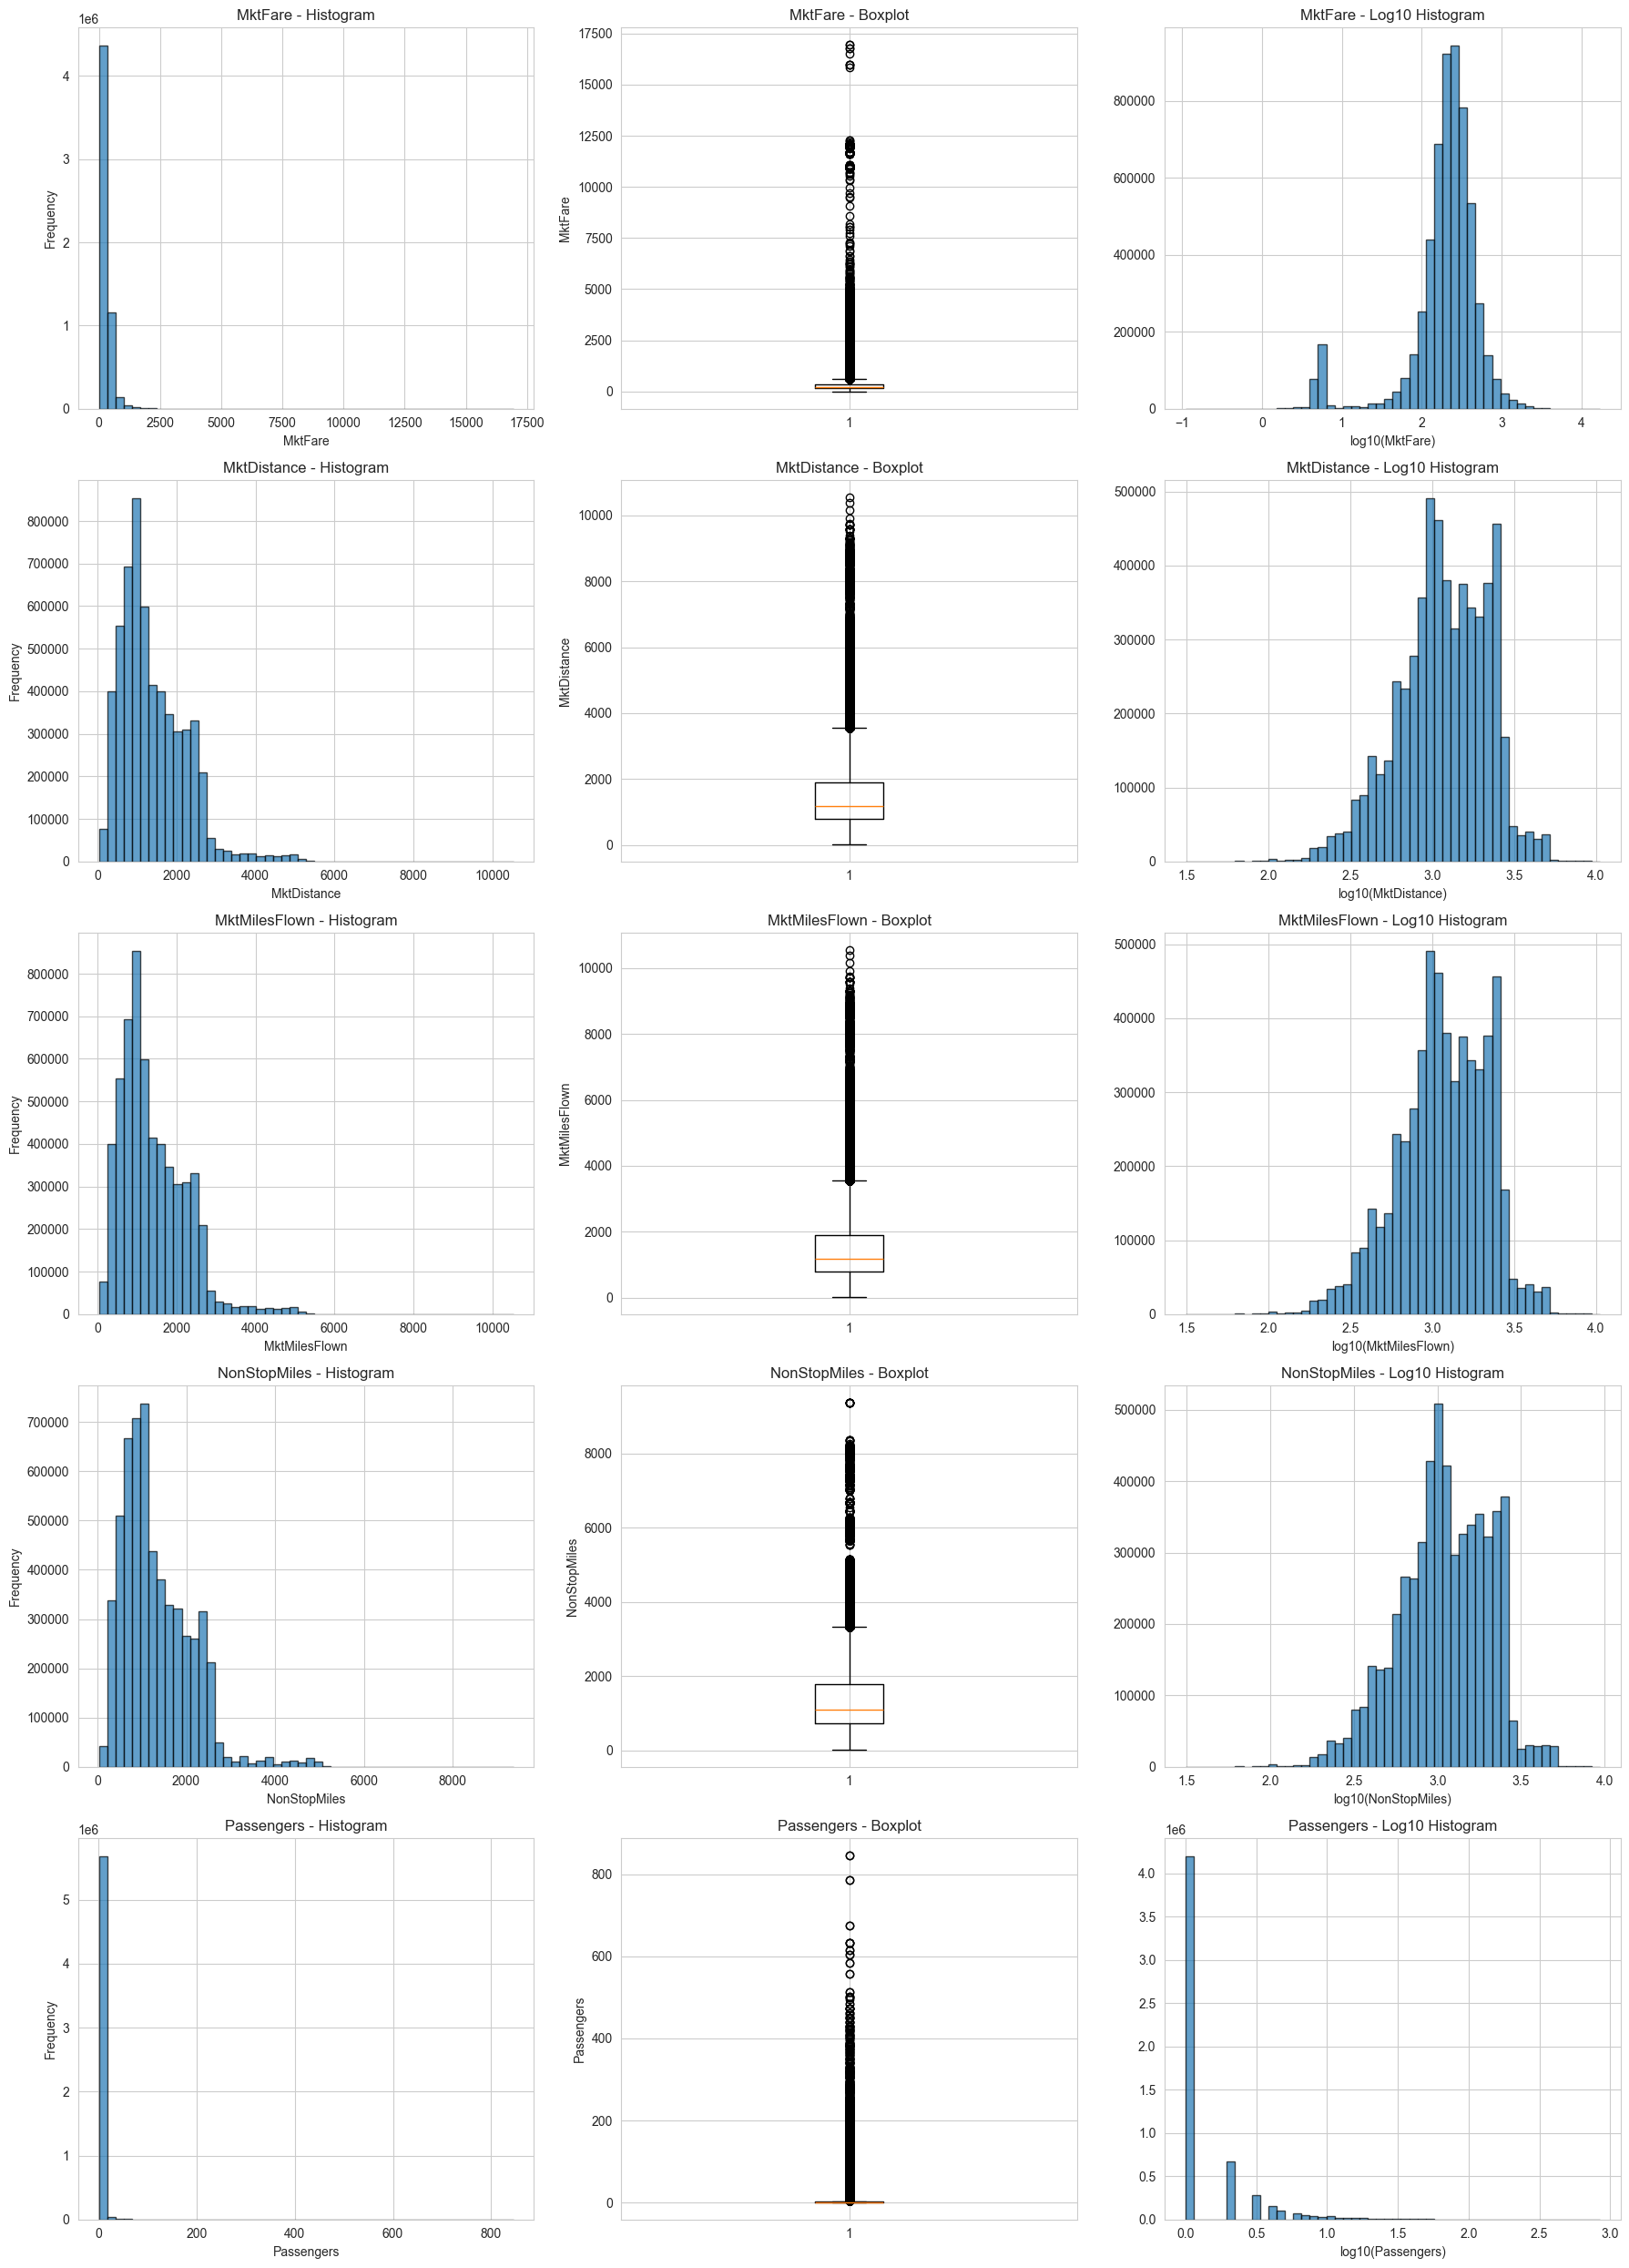


MktCoupons Value Distribution:
MktCoupons
1    3594413
2    2079355
3      60306
4       2168
5         60
6          7
7          3
8          1
Name: count, dtype: int64
Unique values: 8
Missing values: 0

ItinGeoType Value Distribution:
ItinGeoType
1     417589
2    5318724
Name: count, dtype: int64
Unique values: 2
Missing values: 0

MktGeoType Value Distribution:
MktGeoType
1     416691
2    5319622
Name: count, dtype: int64
Unique values: 2
Missing values: 0


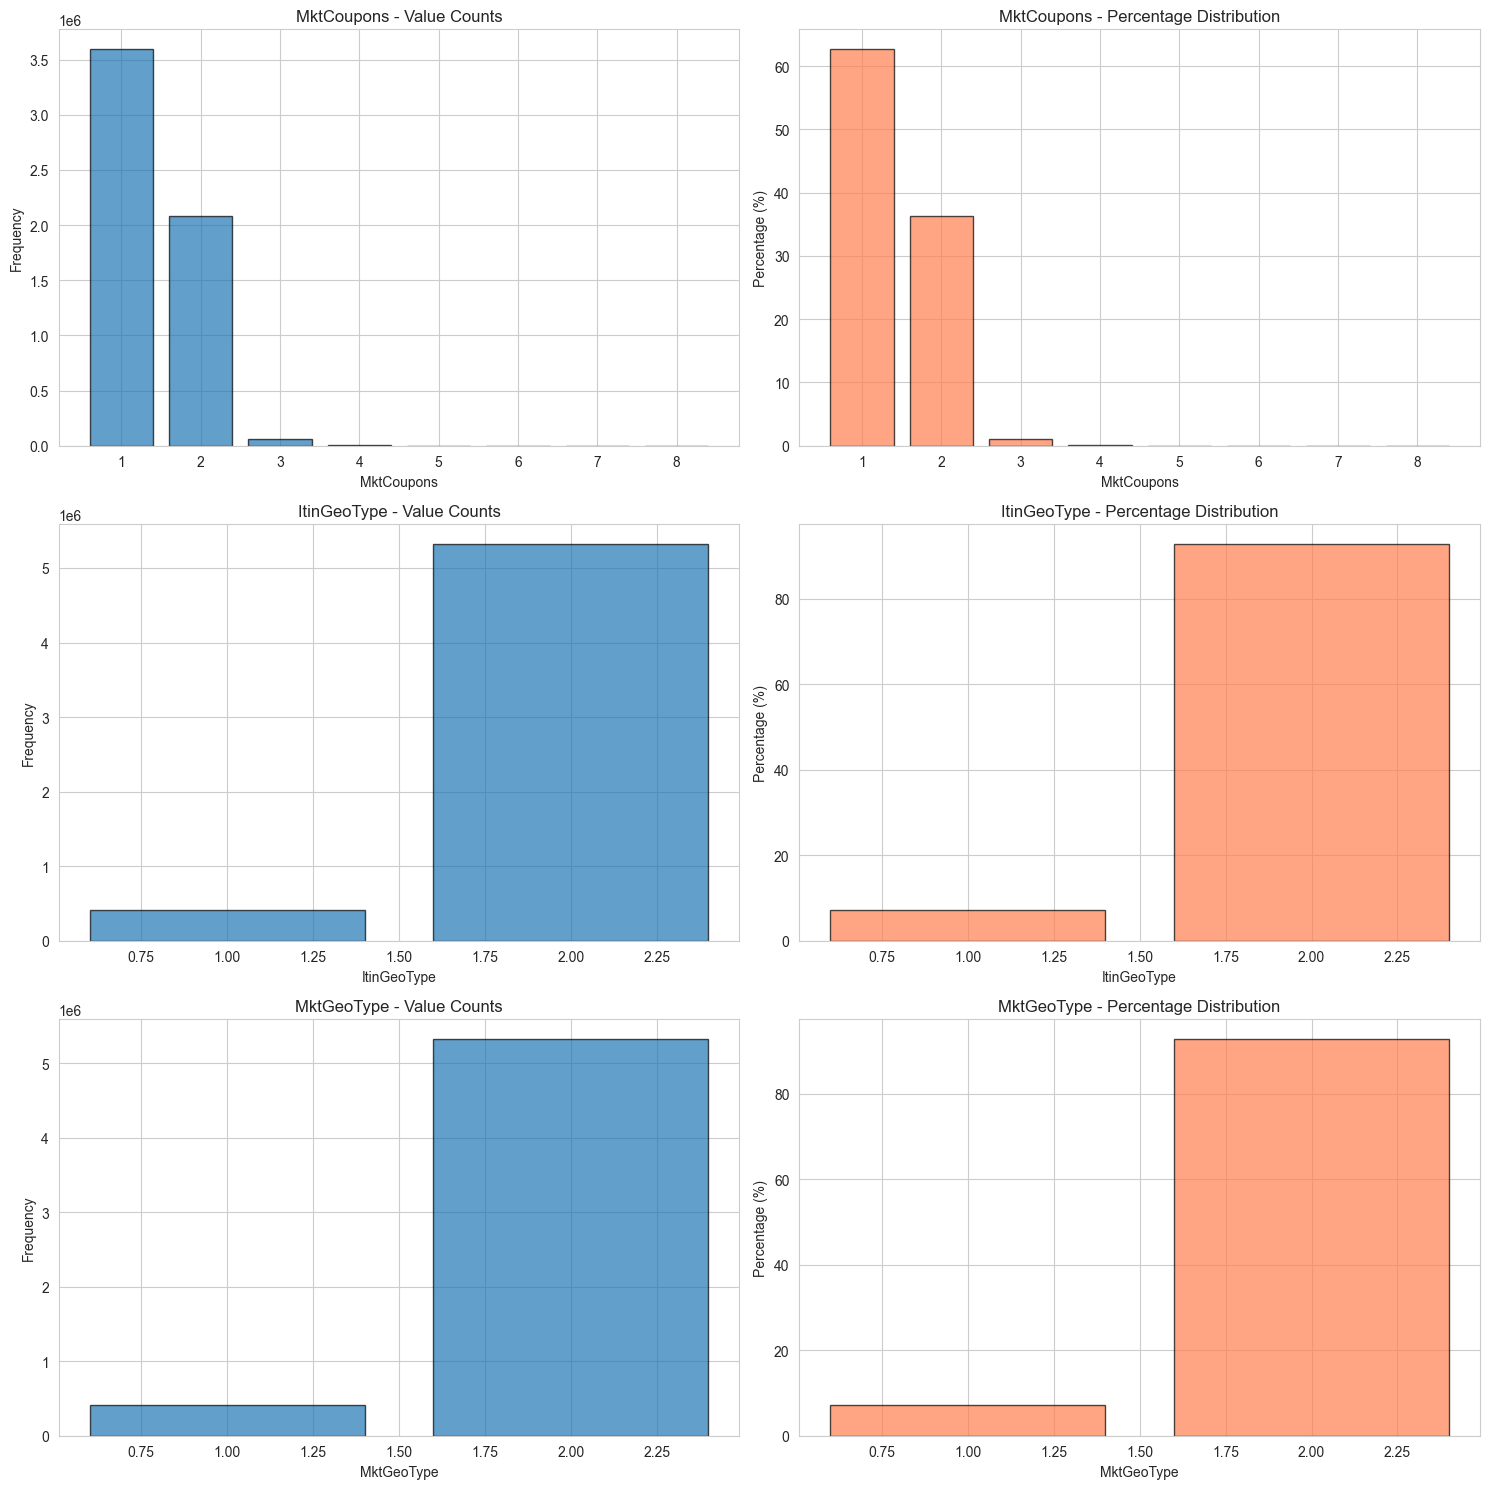

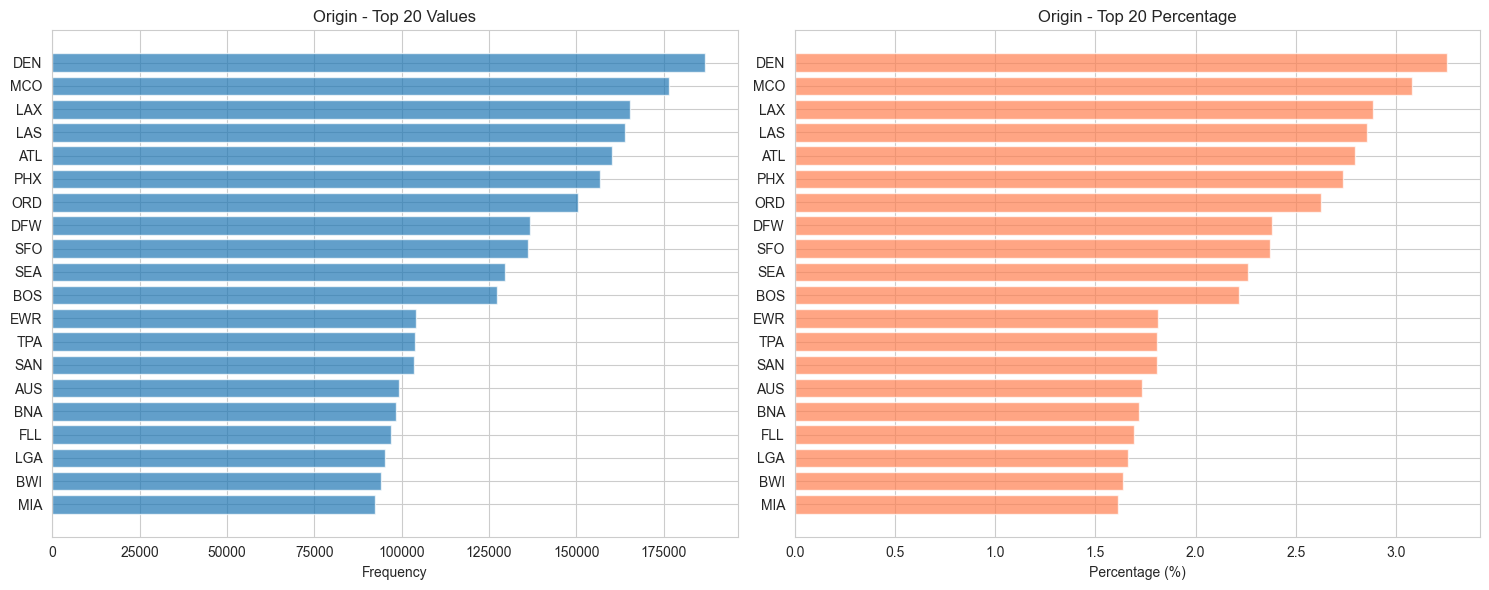


Origin Statistics:
  Unique values: 261
  Most common: DEN (186769 occurrences)
  Missing values: 0


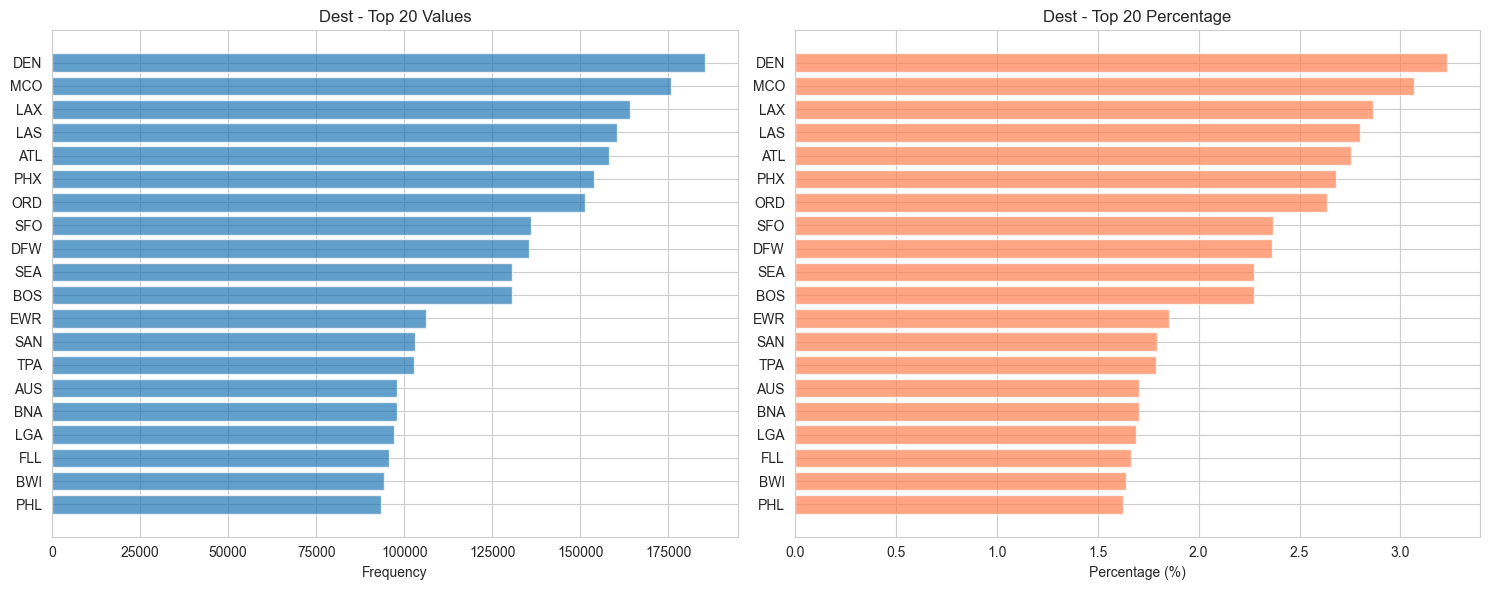


Dest Statistics:
  Unique values: 260
  Most common: DEN (185415 occurrences)
  Missing values: 0


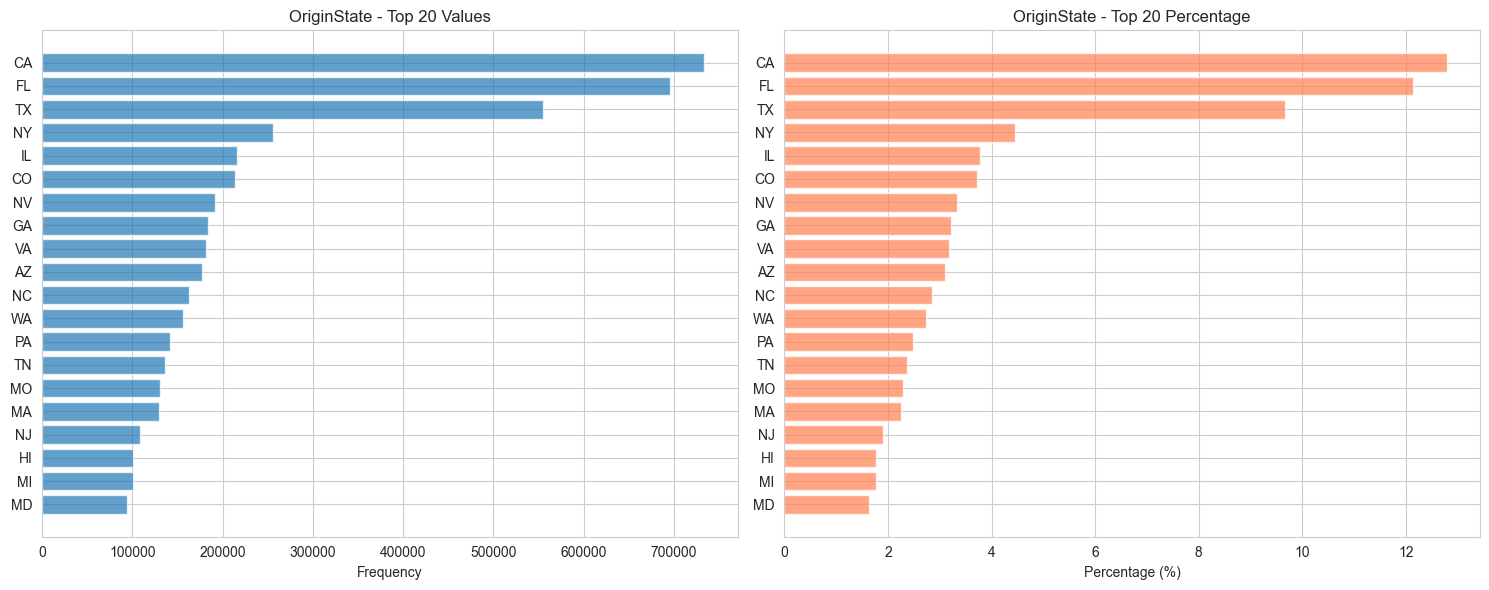


OriginState Statistics:
  Unique values: 52
  Most common: CA (733665 occurrences)
  Missing values: 0


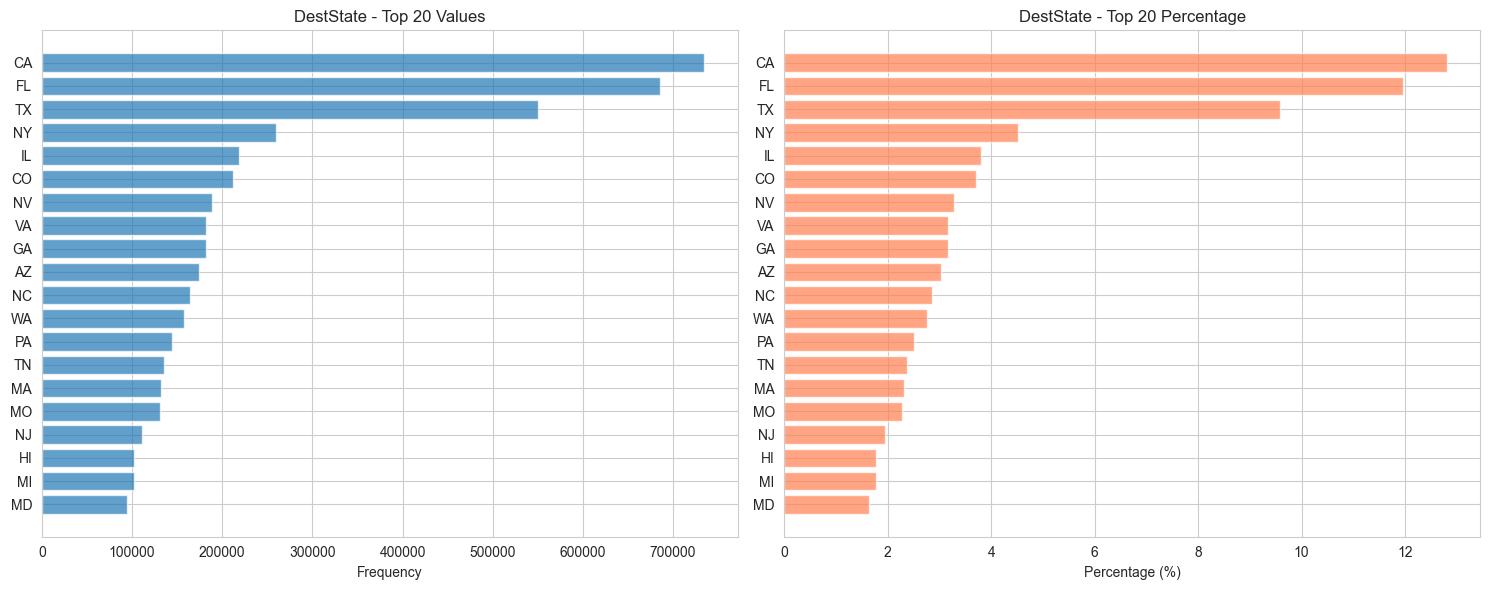


DestState Statistics:
  Unique values: 52
  Most common: CA (734752 occurrences)
  Missing values: 0


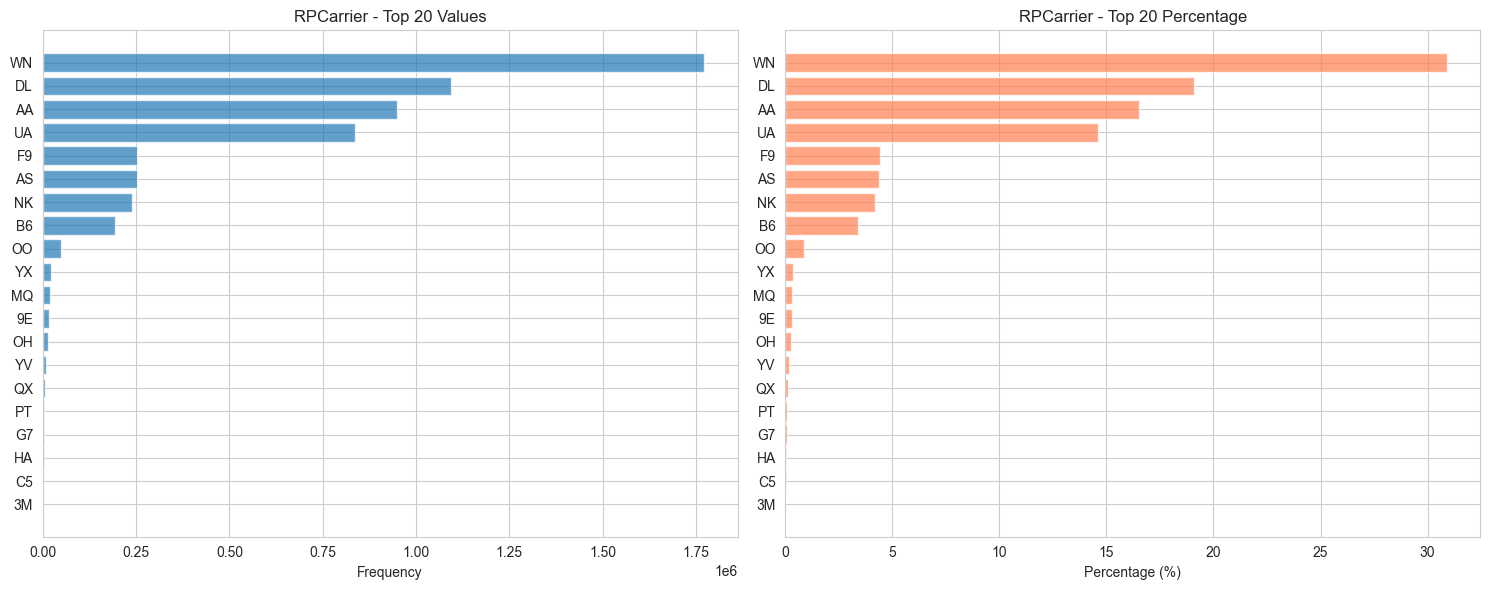


RPCarrier Statistics:
  Unique values: 21
  Most common: WN (1772816 occurrences)
  Missing values: 0


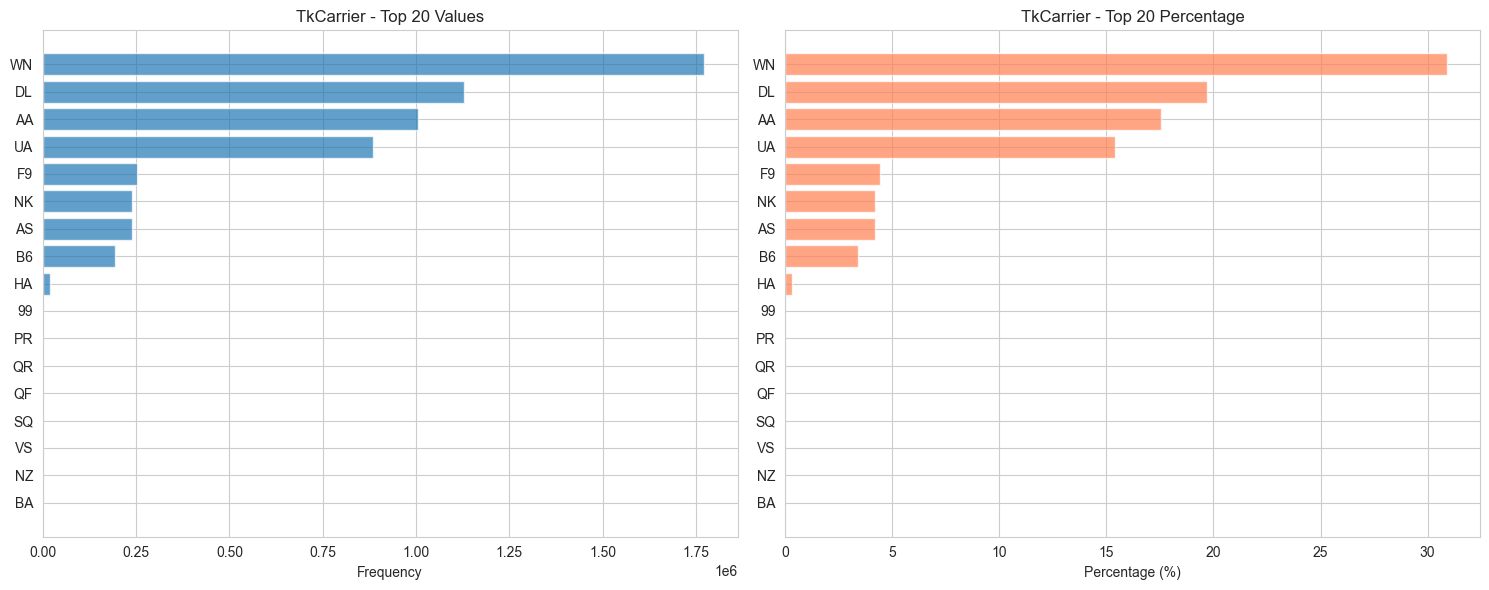


TkCarrier Statistics:
  Unique values: 17
  Most common: WN (1772816 occurrences)
  Missing values: 0


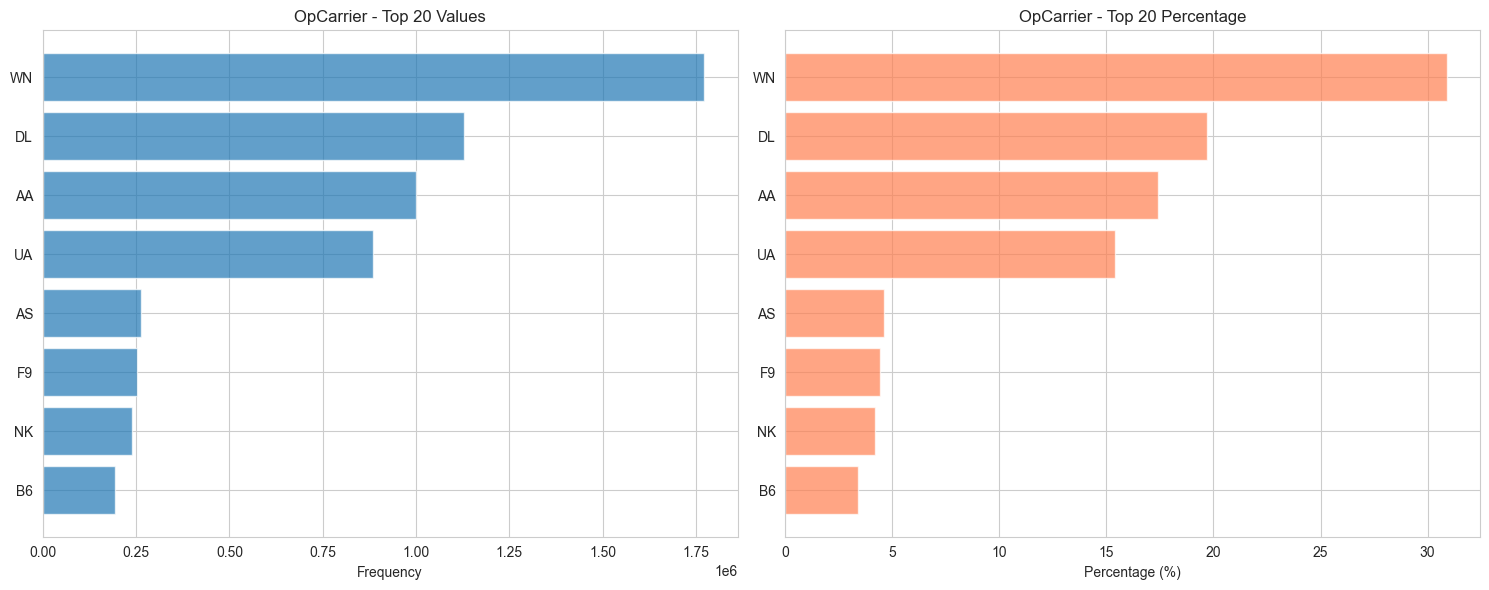


OpCarrier Statistics:
  Unique values: 8
  Most common: WN (1772816 occurrences)
  Missing values: 0


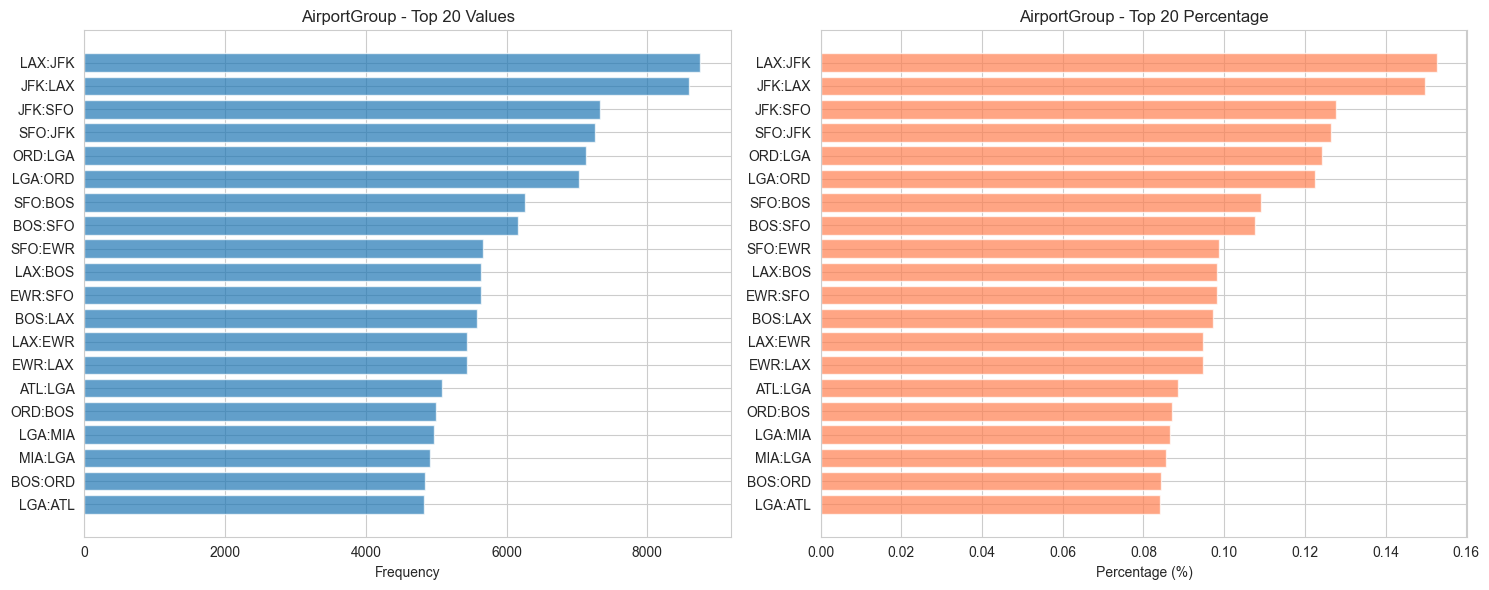


AirportGroup Statistics:
  Unique values: 152563
  Most common: LAX:JFK (8755 occurrences)
  Missing values: 0


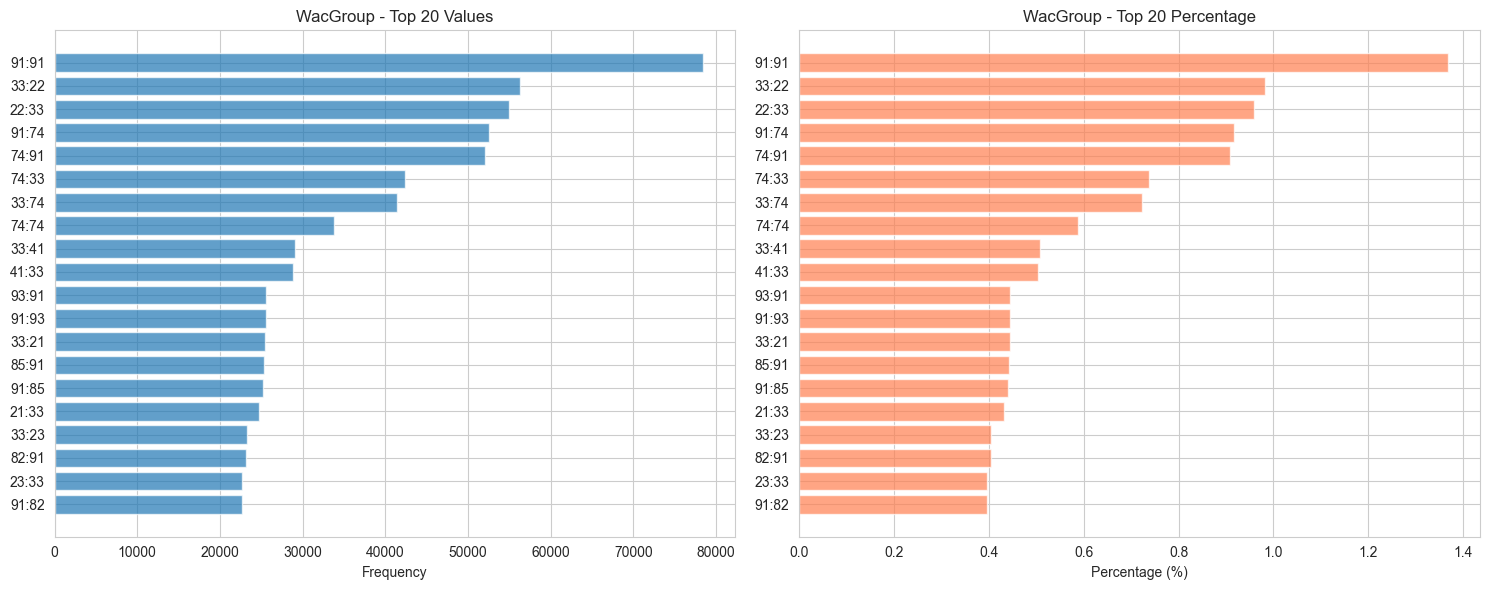


WacGroup Statistics:
  Unique values: 41104
  Most common: 91:91 (78442 occurrences)
  Missing values: 0


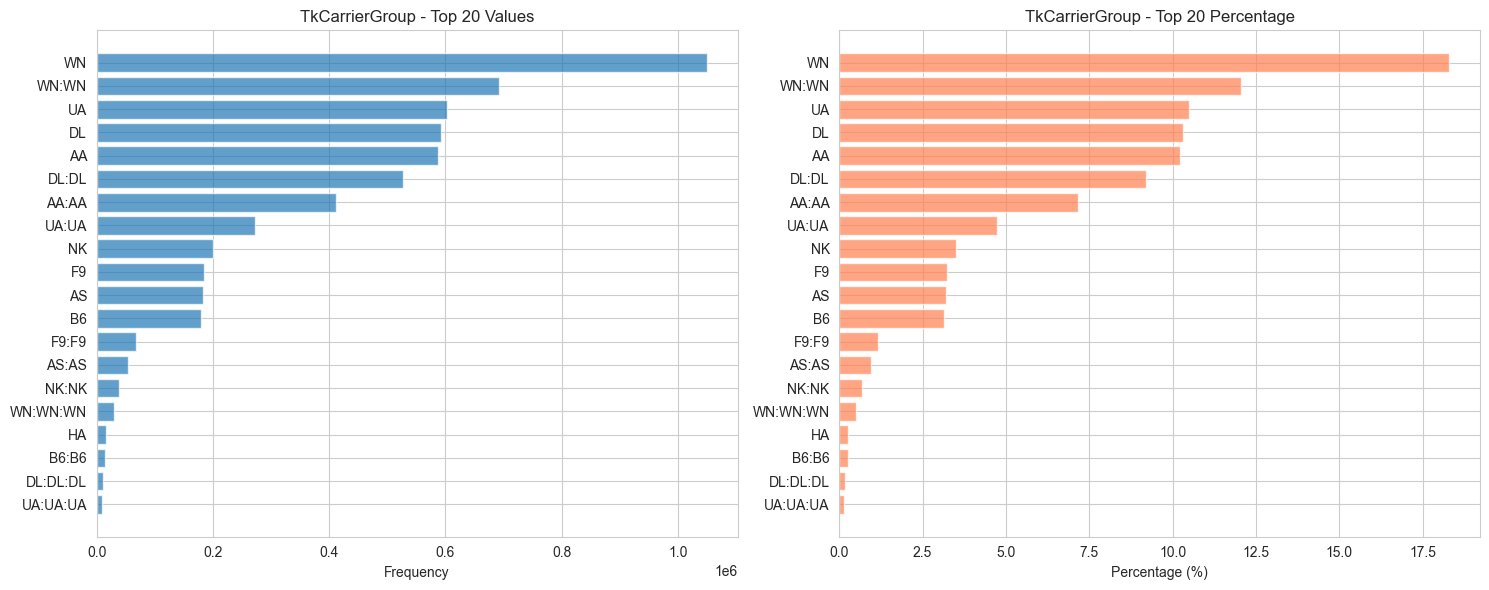


TkCarrierGroup Statistics:
  Unique values: 65
  Most common: WN (1050320 occurrences)
  Missing values: 0


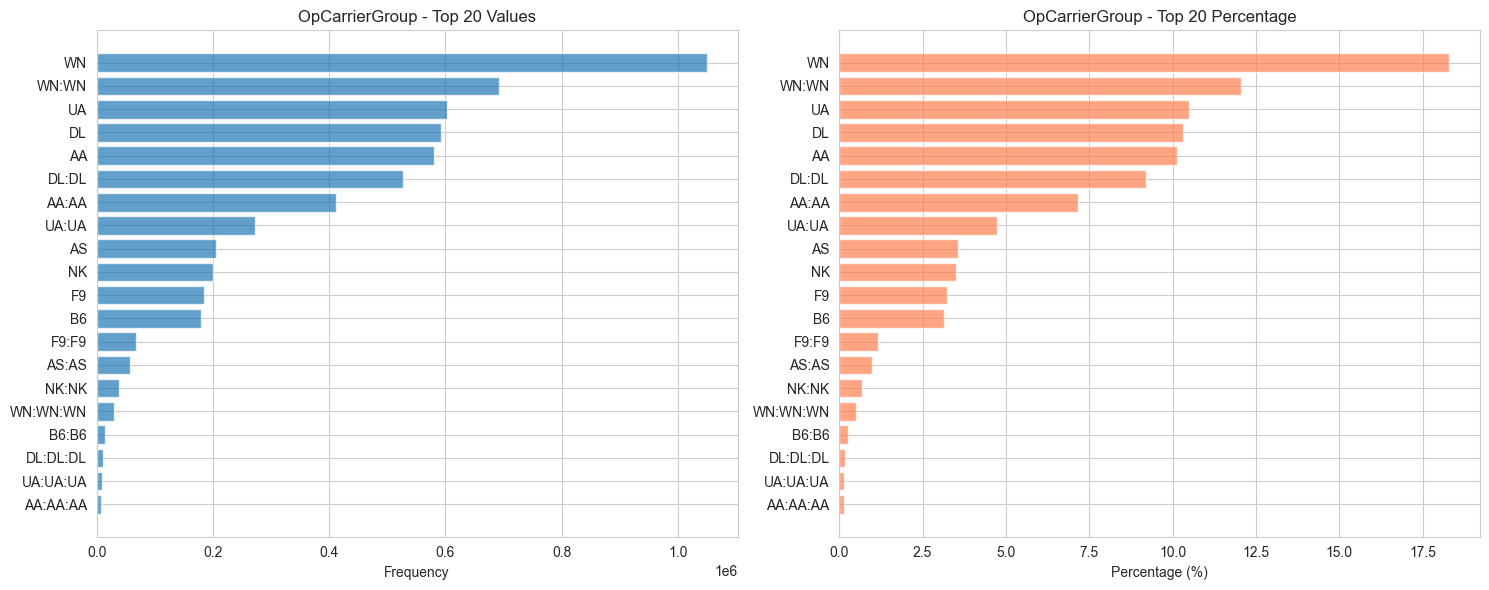


OpCarrierGroup Statistics:
  Unique values: 46
  Most common: WN (1050320 occurrences)
  Missing values: 0

ID FIELDS ANALYSIS

ItinID:
  Total records: 5736313
  Unique values: 3725041
  Duplicates: 2011272
  Missing values: 0
  Data type: int64

MktID:
  Total records: 5736313
  Unique values: 5736313
  Duplicates: 0
  Missing values: 0
  Data type: int64

OriginAirportID:
  Total records: 5736313
  Unique values: 261
  Duplicates: 5736052
  Missing values: 0
  Data type: int64

OriginAirportSeqID:
  Total records: 5736313
  Unique values: 261
  Duplicates: 5736052
  Missing values: 0
  Data type: int64

OriginCityMarketID:
  Total records: 5736313
  Unique values: 241
  Duplicates: 5736072
  Missing values: 0
  Data type: int64

DestAirportID:
  Total records: 5736313
  Unique values: 260
  Duplicates: 5736053
  Missing values: 0
  Data type: int64

DestAirportSeqID:
  Total records: 5736313
  Unique values: 260
  Duplicates: 5736053
  Missing values: 0
  Data type: int64

DestCity

In [5]:
# Run each analysis
analyze_numeric_continuous(df, numeric_continuous)
analyze_numeric_discrete(df, numeric_discrete)
analyze_categorical(df, categorical_low_cardinality, top_n=20)
analyze_ids(df, id_fields)

In [6]:
df_aa_long = df[df['OpCarrier'] == 'AA']

In [7]:
df_aa_long.shape

(999747, 33)

In [8]:
df_aa_long.to_csv('aa_long.csv', index=False)

In [9]:
# Create bidirectional market
df['Market'] = df.apply(lambda x: '-'.join(sorted([x['Origin'], x['Dest']])), axis=1)

# Aggregate by market
top_markets = df.groupby('Market').agg({
    'Passengers': 'sum',
    'MktFare': 'mean',
    'MktMilesFlown': 'mean',
    'NonStopMiles': 'mean'
}).reset_index()

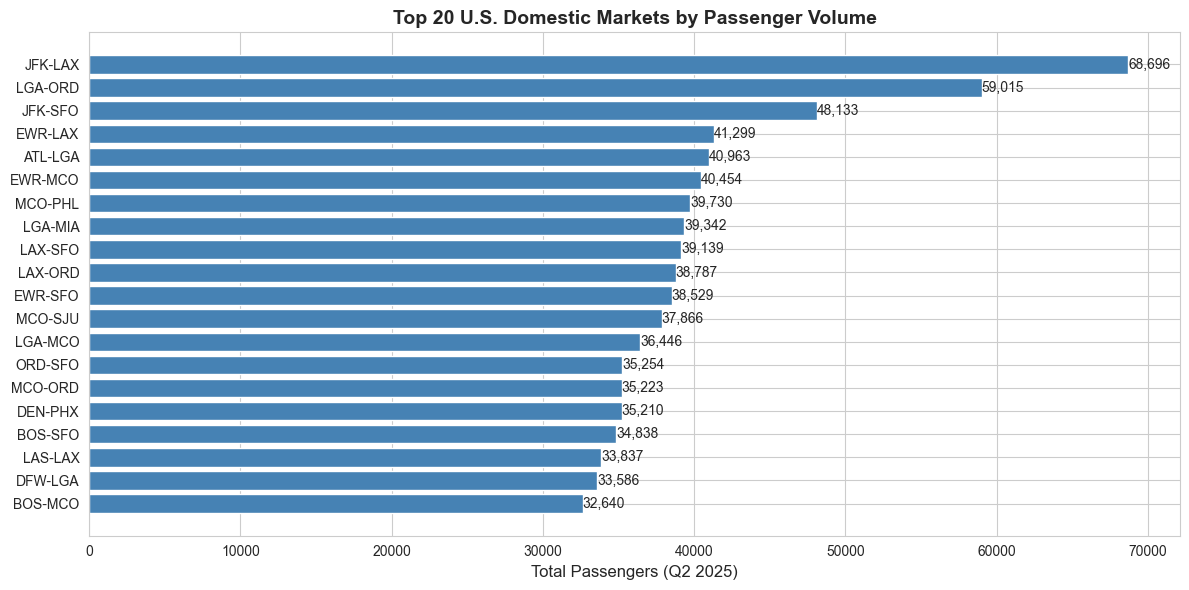

        Market  Passengers     MktFare  MktMilesFlown  NonStopMiles
11000  JFK-LAX     68696.0  744.188893    2490.101572        2475.0
11717  LGA-ORD     59015.0  283.708396     737.205640         733.0
11062  JFK-SFO     48133.0  597.801903    2609.691151        2586.0
7643   EWR-LAX     41299.0  535.262961    2475.743439        2454.0
1294   ATL-LGA     40963.0  267.418756     794.442629         762.0
7652   EWR-MCO     40454.0  250.419213     961.144475         937.0
12219  MCO-PHL     39730.0  208.759481     886.130932         861.0
11699  LGA-MIA     39342.0  305.915386    1112.787016        1096.0
11474  LAX-SFO     39139.0  167.326510     339.080628         337.0
11435  LAX-ORD     38787.0  320.190658    1781.022801        1744.0
7710   EWR-SFO     38529.0  687.413447    2591.484373        2565.0
12256  MCO-SJU     37866.0  182.866421    1217.818956        1189.0
11694  LGA-MCO     36446.0  224.095600     986.027349         950.0
13657  ORD-SFO     35254.0  367.749085    1883.7

In [10]:
top_markets = top_markets.sort_values('Passengers', ascending=False).head(20)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top_markets['Market'], top_markets['Passengers'], color='steelblue')
ax.set_xlabel('Total Passengers (Q2 2025)', fontsize=12)
ax.set_title('Top 20 U.S. Domestic Markets by Passenger Volume', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(top_markets)

In [11]:
df_aa = df[df['OpCarrier'] == 'AA']
df_aa.head(15)

,ItinID,MktID,MktCoupons,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginStateFips,OriginState,OriginStateName,...,TkCarrier,OpCarrier,Passengers,MktFare,MktDistance,MktMilesFlown,NonStopMiles,ItinGeoType,MktGeoType,Market
510691,202524007525,20252400752503,2,10257,1025702,30257,ALB,36,NY,New York,...,AA,AA,1.0,183.58,1461.0,1461.0,1021.0,2,2,ALB-DSM
510693,202524007538,20252400753803,2,10299,1029906,30299,ANC,2,AK,Alaska,...,AA,AA,1.0,408.86,3895.0,3895.0,2519.0,1,1,ANC-MSP
510694,202524007542,20252400754203,2,10397,1039707,30397,ATL,13,GA,Georgia,...,AA,AA,1.0,378.00,905.0,905.0,743.0,2,2,ATL-DSM
510695,202524007545,20252400754503,2,10423,1042302,30423,AUS,48,TX,Texas,...,AA,AA,1.0,187.34,814.0,814.0,813.0,2,2,AUS-DSM
510696,202524007547,20252400754703,2,10423,1042302,30423,AUS,48,TX,Texas,...,AA,AA,1.0,393.76,814.0,814.0,813.0,2,2,AUS-DSM
510697,202524007589,20252400758903,1,10693,1069302,30693,BNA,47,TN,Tennessee,...,AA,AA,1.0,170.69,631.0,631.0,631.0,2,2,BNA-DFW
510698,202524007589,20252400758904,1,11298,1129806,30194,DFW,48,TX,Texas,...,AA,AA,1.0,168.79,624.0,624.0,624.0,2,2,DFW-DSM
510699,202524007604,20252400760404,1,12478,1247805,31703,JFK,36,NY,New York,...,AA,AA,1.0,442.49,2586.0,2586.0,2586.0,2,2,JFK-SFO
510702,202524007629,20252400762904,1,11057,1105703,31057,CLT,37,NC,North Carolina,...,AA,AA,1.0,168.93,728.0,728.0,728.0,2,2,BOS-CLT
510703,202524007633,20252400763303,2,10849,1084907,30849,BZN,30,MT,Montana,...,AA,AA,1.0,228.00,1484.0,1484.0,922.0,2,2,BZN-DSM


In [12]:
df_aa.shape

(999747, 34)

In [13]:
df_aa.columns

Index(['ItinID', 'MktID', 'MktCoupons', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginStateFips',
       'OriginState', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestStateFips',
       'DestState', 'DestStateName', 'DestWac', 'AirportGroup', 'WacGroup',
       'TkCarrierGroup', 'OpCarrierGroup', 'RPCarrier', 'TkCarrier',
       'OpCarrier', 'Passengers', 'MktFare', 'MktDistance', 'MktMilesFlown',
       'NonStopMiles', 'ItinGeoType', 'MktGeoType', 'Market'],
      dtype='object')

In [14]:
df_aa.describe()

,ItinID,MktID,MktCoupons,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,Passengers,MktFare,MktDistance,MktMilesFlown,NonStopMiles,ItinGeoType,MktGeoType
count,9.997470e+05,9.997470e+05,999747.000000,999747.000000,9.997470e+05,999747.000000,999747.000000,999747.000000,999747.000000,9.997470e+05,999747.000000,999747.000000,999747.000000,999747.000000,999747.000000,999747.000000,999747.000000,999747.000000,999747.000000,999747.000000
mean,8.425066e+10,8.425066e+12,1.427766,12899.708930,1.289975e+06,31942.360250,28.403895,52.651808,12897.306174,1.289735e+06,31945.116240,28.460959,52.433335,1.979802,302.862561,1470.403923,1470.403923,1397.370586,1.936692,1.936829
std,8.700072e+10,8.700072e+12,0.512077,1514.666936,1.514664e+05,1423.496179,17.600821,26.591483,1516.541530,1.516539e+05,1424.878197,17.553462,26.579335,4.992533,264.590746,821.296920,821.296920,786.070201,0.243516,0.243270
min,2.025214e+10,2.025214e+12,1.000000,10136.000000,1.013603e+06,30136.000000,1.000000,1.000000,10135.000000,1.013506e+06,30135.000000,1.000000,1.000000,1.000000,0.460000,75.000000,75.000000,75.000000,1.000000,1.000000
25%,2.025245e+10,2.025245e+12,1.000000,11298.000000,1.129806e+06,30721.000000,12.000000,33.000000,11298.000000,1.129806e+06,30721.000000,12.000000,33.000000,1.000000,174.000000,867.000000,867.000000,824.000000,2.000000,2.000000
50%,2.025281e+10,2.025281e+12,1.000000,13204.000000,1.320402e+06,31650.000000,31.000000,42.000000,13204.000000,1.320402e+06,31650.000000,31.000000,41.000000,1.000000,252.000000,1273.000000,1273.000000,1205.000000,2.000000,2.000000
75%,2.025211e+11,2.025211e+13,2.000000,14107.000000,1.410702e+06,33192.000000,45.000000,74.000000,14107.000000,1.410702e+06,33192.000000,45.000000,74.000000,1.000000,364.340000,2044.000000,2044.000000,1916.000000,2.000000,2.000000
max,2.025270e+11,2.025270e+13,6.000000,15919.000000,1.591905e+06,35412.000000,78.000000,93.000000,16218.000000,1.621802e+06,35412.000000,78.000000,93.000000,603.000000,16936.000000,7247.000000,7247.000000,5981.000000,2.000000,2.000000


In [15]:
df_aa.to_csv('aa_top_routes.csv')

In [16]:
top_markets.head(15)

,Market,Passengers,MktFare,MktMilesFlown,NonStopMiles
11000,JFK-LAX,68696.0,744.188893,2490.101572,2475.0
11717,LGA-ORD,59015.0,283.708396,737.205640,733.0
11062,JFK-SFO,48133.0,597.801903,2609.691151,2586.0
7643,EWR-LAX,41299.0,535.262961,2475.743439,2454.0
1294,ATL-LGA,40963.0,267.418756,794.442629,762.0
7652,EWR-MCO,40454.0,250.419213,961.144475,937.0
12219,MCO-PHL,39730.0,208.759481,886.130932,861.0
11699,LGA-MIA,39342.0,305.915386,1112.787016,1096.0
11474,LAX-SFO,39139.0,167.326510,339.080628,337.0
11435,LAX-ORD,38787.0,320.190658,1781.022801,1744.0
